# Explore here

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from pickle import dump

In [15]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'


data = pd.read_csv(url, delimiter=',')

#import urllib.request
#urllib.request.urlretrieve(url, 'medical_insurance_cost.csv')

print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

## Variables Univariantes

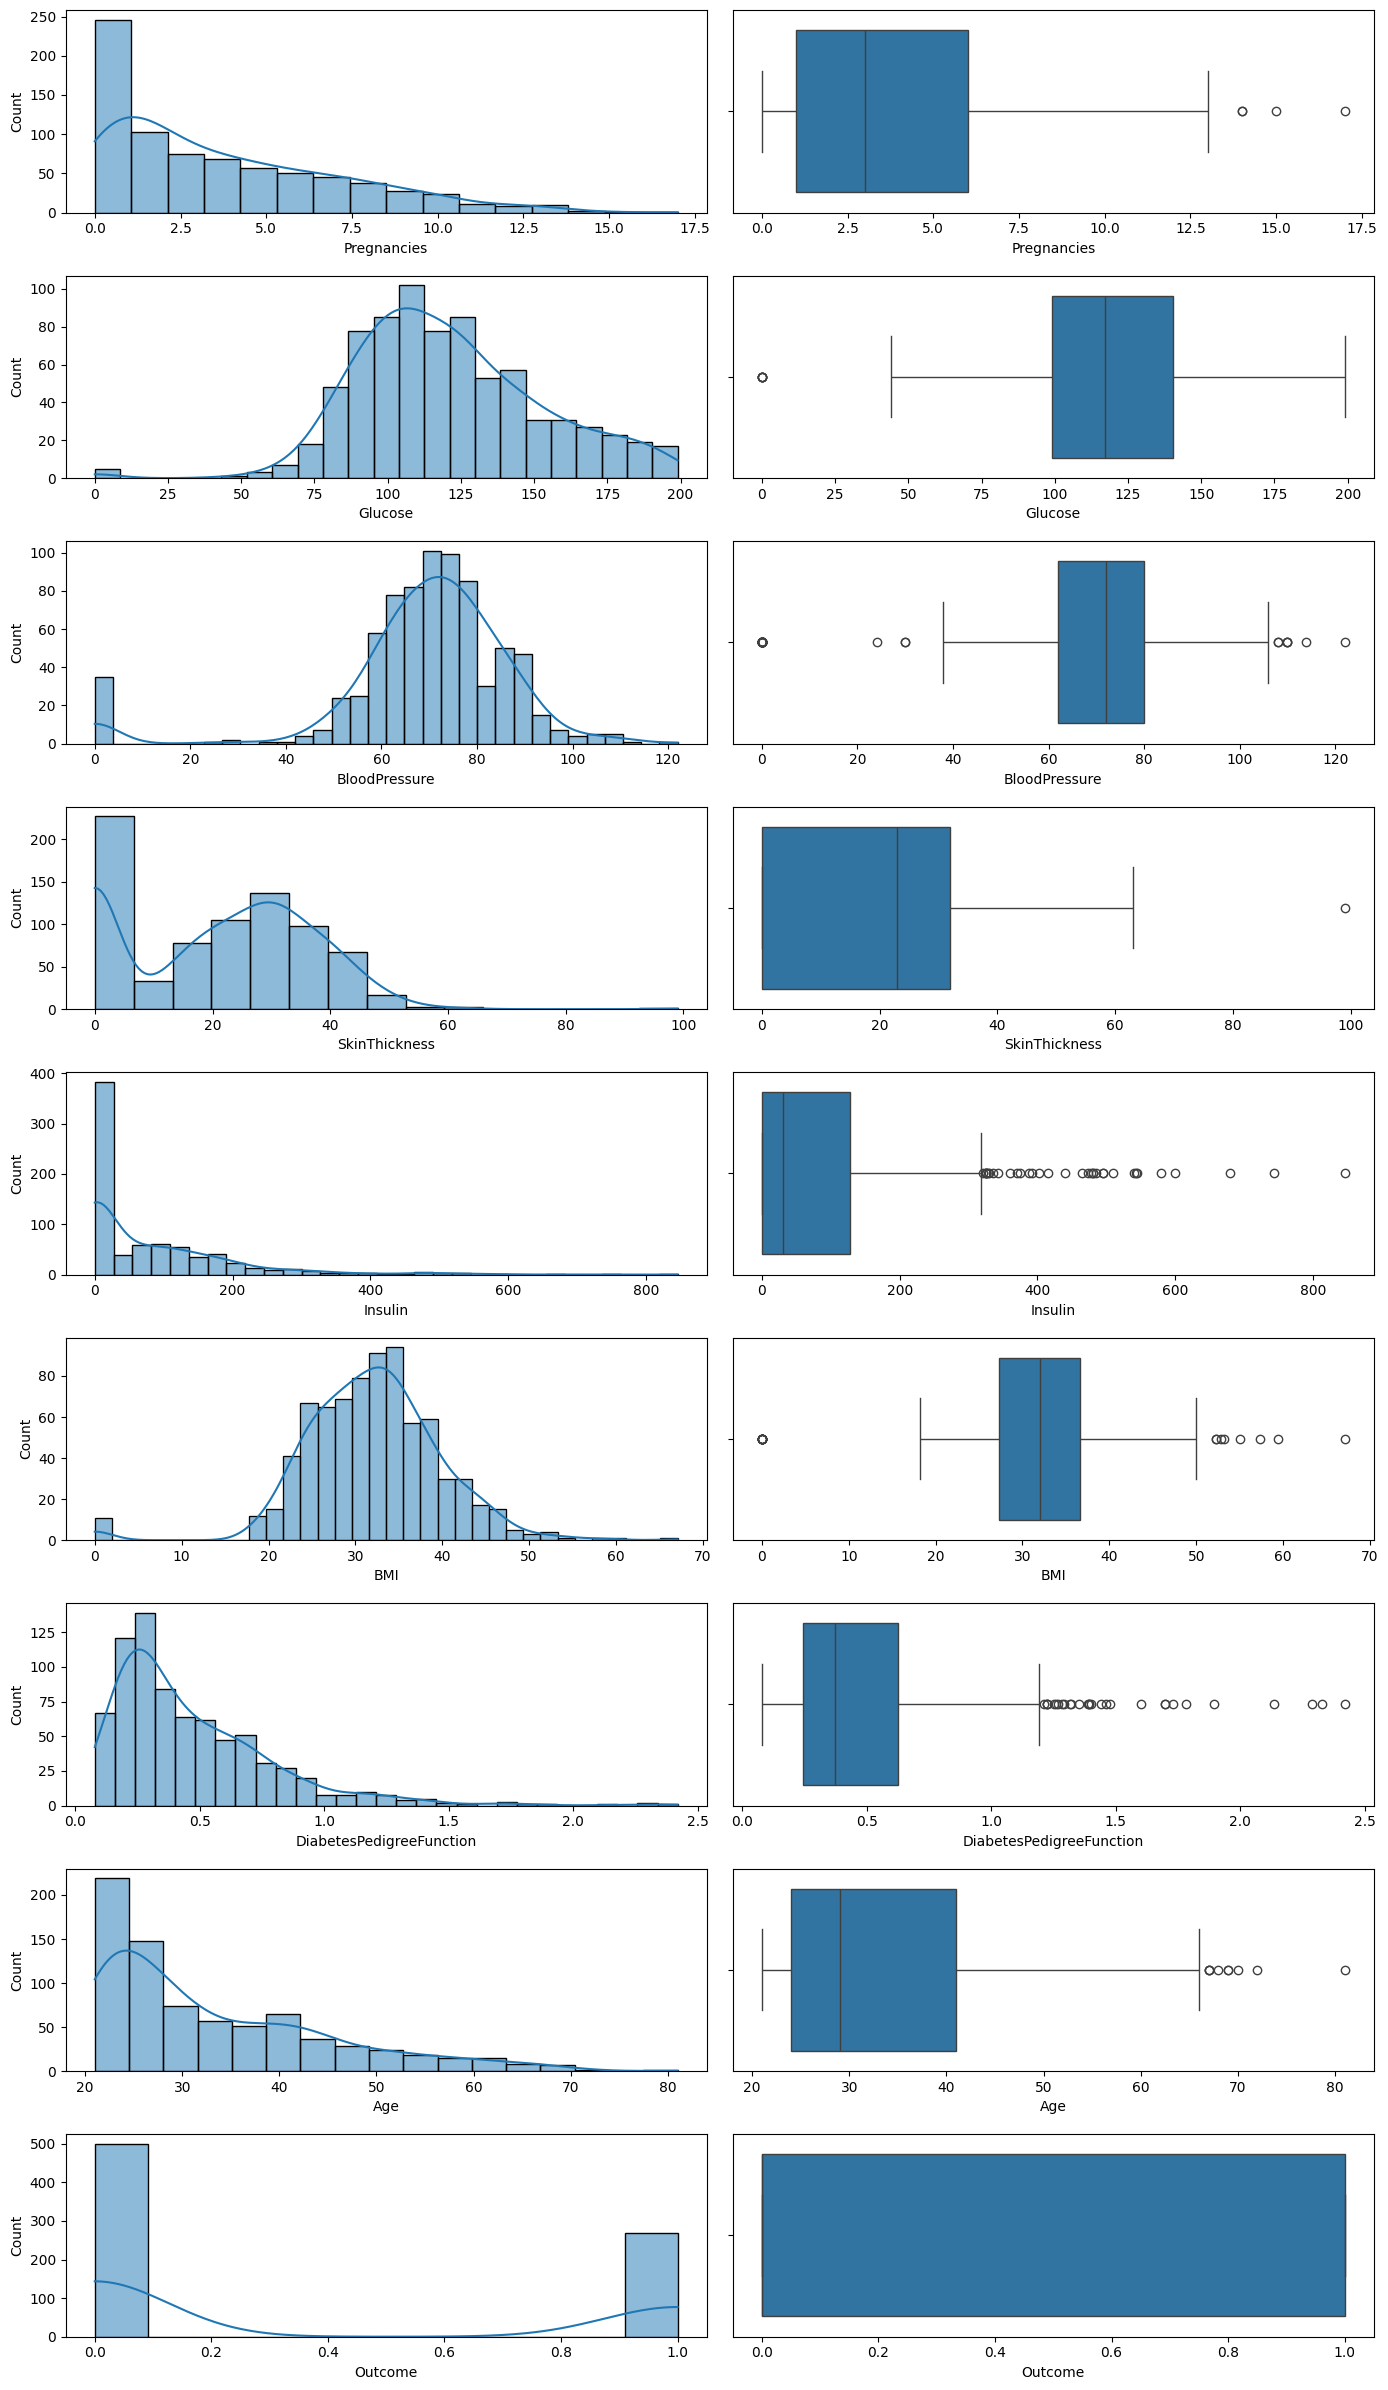

In [18]:
fig, axis = plt.subplots(9, 2, figsize=(14, 24))

sns.histplot(ax=axis[0, 0], data=data, x="Pregnancies", kde=True)
sns.boxplot(ax=axis[0, 1], data=data, x="Pregnancies")

sns.histplot(ax=axis[1, 0], data=data, x="Glucose", kde=True)
sns.boxplot(ax=axis[1, 1], data=data, x="Glucose")

sns.histplot(ax=axis[2, 0], data=data, x="BloodPressure", kde=True)
sns.boxplot(ax=axis[2, 1], data=data, x="BloodPressure")

sns.histplot(ax=axis[3, 0], data=data, x="SkinThickness", kde=True)
sns.boxplot(ax=axis[3, 1], data=data, x="SkinThickness")

sns.histplot(ax=axis[4, 0], data=data, x="Insulin", kde=True)
sns.boxplot(ax=axis[4, 1], data=data, x="Insulin")

sns.histplot(ax=axis[5, 0], data=data, x="BMI", kde=True)
sns.boxplot(ax=axis[5, 1], data=data, x="BMI")

sns.histplot(ax=axis[6, 0], data=data, x="DiabetesPedigreeFunction", kde=True)
sns.boxplot(ax=axis[6, 1], data=data, x="DiabetesPedigreeFunction")

sns.histplot(ax=axis[7, 0], data=data, x="Age", kde=True)
sns.boxplot(ax=axis[7, 1], data=data, x="Age")

sns.histplot(ax=axis[8, 0], data=data, x="Outcome", kde=True)
sns.boxplot(ax=axis[8, 1], data=data, x="Outcome")

plt.tight_layout()
plt.show()

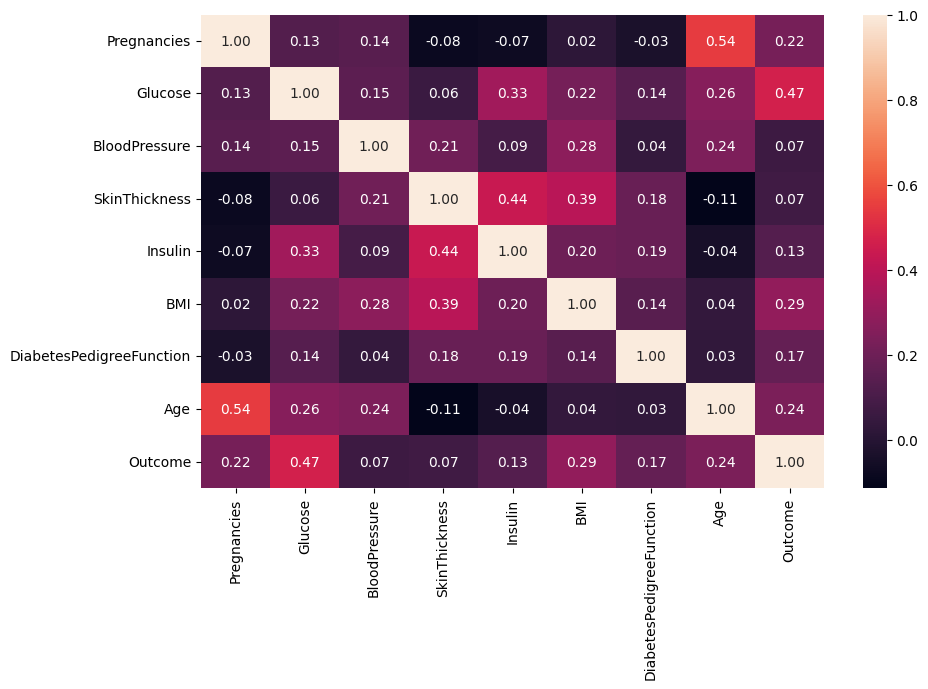

In [19]:
fig, axis = plt.subplots(figsize = (10, 7))
sns.heatmap(data.corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

In [20]:
X = data.drop(["Outcome"], axis = 1)
y = data['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


criterios = ['gini', 'entropy']  

for criterio in criterios:
    modelo = DecisionTreeClassifier(criterion=criterio, random_state=42)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    print(f"\n=== Resultados con criterio: {criterio} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))


=== Resultados con criterio: gini ===
Accuracy: 0.7467532467532467
Precision: 0.625
Recall: 0.7272727272727273
F1-score: 0.6722689075630253

=== Resultados con criterio: entropy ===
Accuracy: 0.7207792207792207
Precision: 0.603448275862069
Recall: 0.6363636363636364
F1-score: 0.6194690265486725


In [21]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6]
}

for criterio in criterios:
    modelo = DecisionTreeClassifier(criterion=criterio, random_state=42)
    grid = GridSearchCV(modelo, param_grid, cv=5, scoring='f1')
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n=== Grid Search para criterio: {criterio} ===")
    print("Mejores hiperparámetros:", grid.best_params_)
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    print(f"F1-score: {f1:.2f}")


=== Grid Search para criterio: gini ===
Mejores hiperparámetros: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 20}
Accuracy: 0.79
Precision: 0.74
Recall: 0.64
F1-score: 0.69

=== Grid Search para criterio: entropy ===
Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 20}
Accuracy: 0.75
Precision: 0.65
Recall: 0.65
F1-score: 0.65


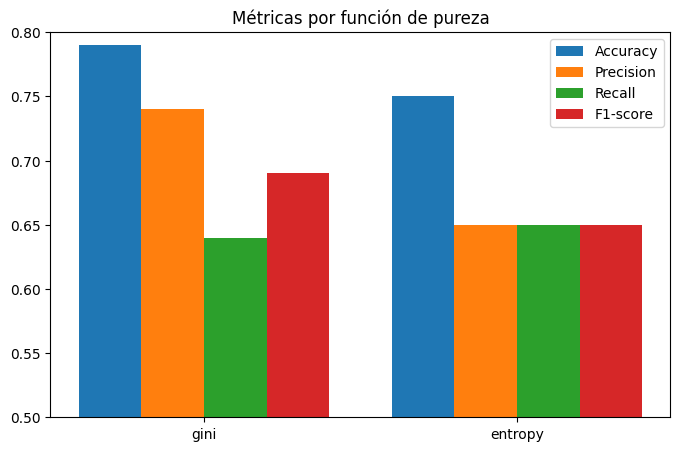

In [22]:

criterios = ['gini', 'entropy']
metricas = {
    'Accuracy': [0.79, 0.75],
    'Precision': [0.74, 0.65],
    'Recall': [0.64, 0.65],
    'F1-score': [0.69, 0.65]
}

x = np.arange(len(criterios))
ancho = 0.2

plt.figure(figsize=(8, 5))

for i, (nombre, valores) in enumerate(metricas.items()):
    plt.bar(x + i * ancho, valores, width=ancho, label=nombre)

plt.ylim(0.5, 0.8)
plt.title("Métricas por función de pureza")
plt.legend()
plt.xticks(x + ancho * 1.5, criterios)
plt.show()


In [23]:
mejor_modelo = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_leaf=1,
    min_samples_split=20,
    random_state=42
)

mejor_modelo.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,20
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [24]:
'''
=== Grid Search para criterio: gini ===
Mejores hiperparámetros: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 20}
Accuracy: 0.79
Precision: 0.74
Recall: 0.64
F1-score: 0.69
'''

"\n=== Grid Search para criterio: gini ===\nMejores hiperparámetros: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 20}\nAccuracy: 0.79\nPrecision: 0.74\nRecall: 0.64\nF1-score: 0.69\n"

In [25]:
dump(mejor_modelo, open("decision_tree.sav", "wb"))